# Analyze Voltage Steps (Clampfit ABF Format)

Be sure to cite:
    
"Analysis of electrophysiological recordings was performed with custom software written for this project using Python 3.7 and the pyABF module¹."

[1] Harden, SW (2020). pyABF 2.2.3. [Online]. Available: https://pypi.org/project/pyabf/, Accessed on: Sep. 24, 2019.

### User Input

In [13]:
file_in = '19n13066.abf'     # Assumes python notebook is in the same dir as the ABF file
label = 'WT'                 # Prefix for output files, usually the genotype 

### Import Packages

In [185]:
import pyabf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from sklearn.metrics import auc
from mpl_toolkits.mplot3d import Axes3D

### Read in the data

In [186]:
abf = pyabf.ABF(file_in)   # Read in time series from ABF file

### Default Values

In [187]:
sweep_list = abf.sweepList # Get all sweeps in the file
scale_ms = abf.dataPointsPerMs
scale_s = scale_ms * 1000

### Built-in pyABF 3D plot

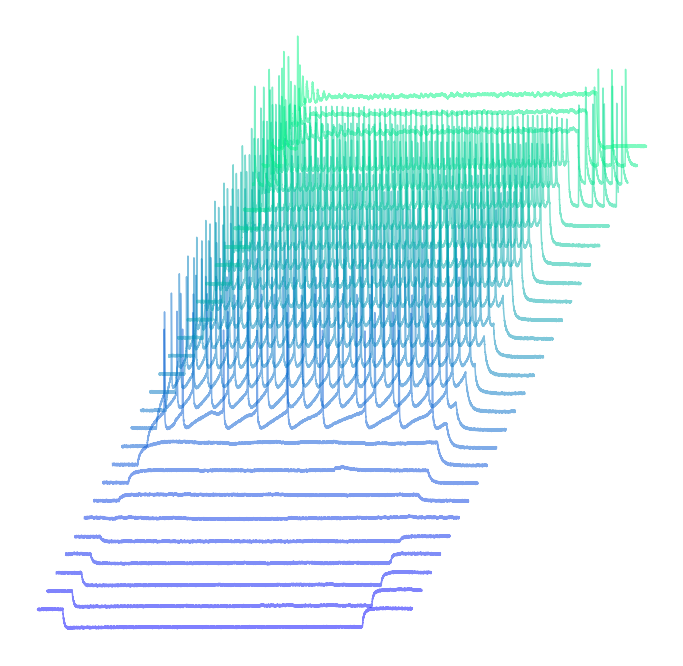

In [188]:
def default_3D ():
    # use a custom colormap to create a different color for every sweep
    cm = plt.get_cmap("winter")
    colors = [cm(x/abf.sweepCount) for x in sweep_list]
    # colors.reverse()

    plt.figure(figsize=(12, 12))
    for sweepNumber in sweep_list:
        abf.setSweep(sweepNumber)
        i1, i2 = 0, int(abf.dataRate * 1)
        dataX = abf.sweepX[i1:i2] + .025 * sweepNumber
        dataY = abf.sweepY[i1:i2] + 15 * sweepNumber
        plt.plot(dataX, dataY, color=colors[sweepNumber], alpha=.5)
    plt.gca().axis('off')
    
    # save the figure
    plt.savefig (file_in.replace('.abf','_builtin3d.jpg'), dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)
    
default_3D()


## Custom 3D plot (Can be modified)

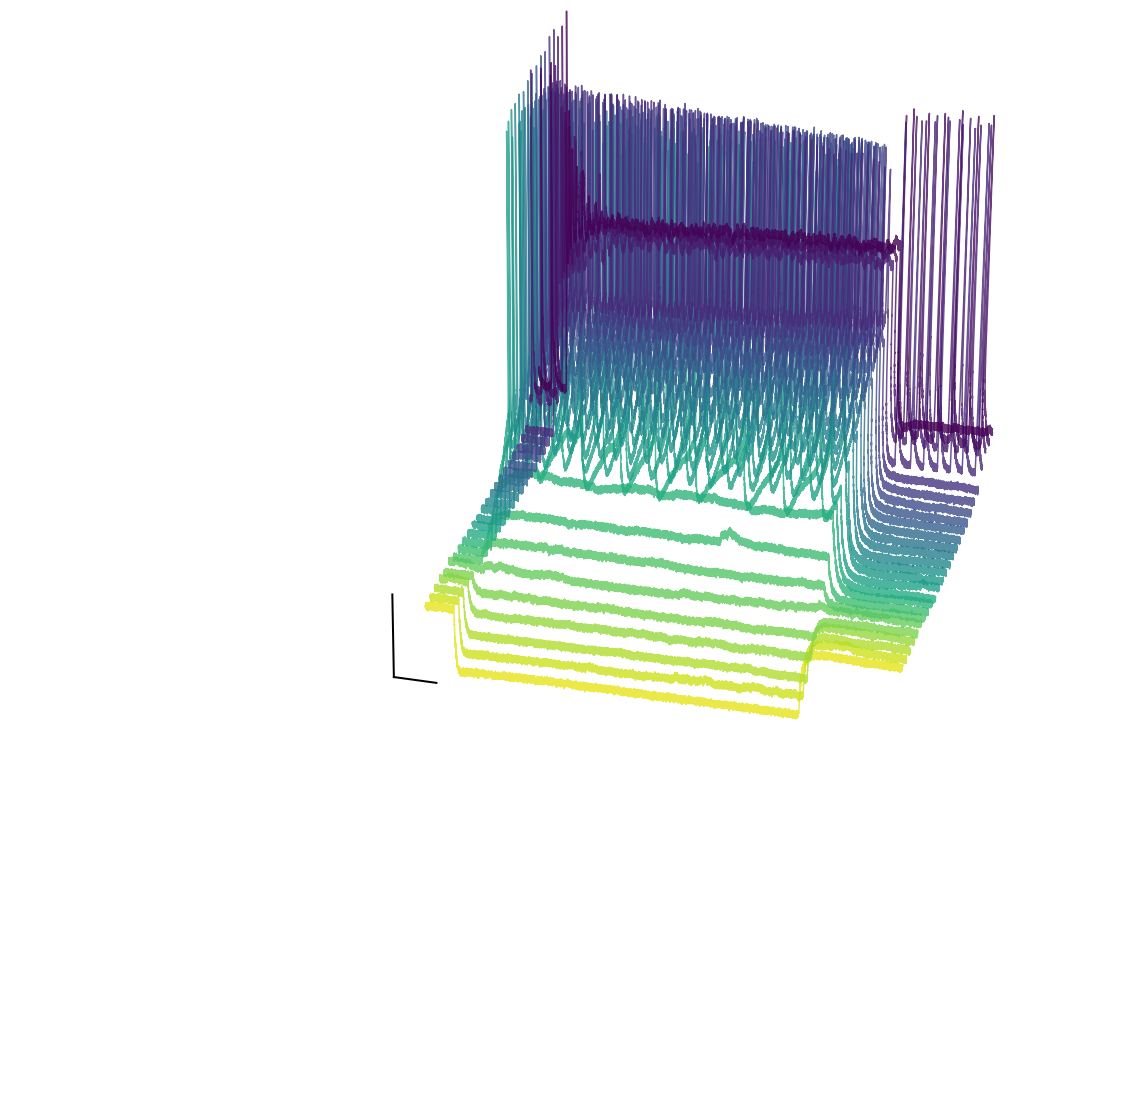

In [247]:
def custom_3d ():
    
    x_max = 0
    x_min = 0
    y_max = 0
    y_min = 0
    i = 0
    
    fig = plt.figure(figsize =(20,20))
    ax = fig.add_subplot(111, projection='3d')

    for sweep in sweep_list:
        cm = plt.get_cmap("viridis")
        colors = [cm(x/abf.sweepCount) for x in sweep_list]
        colors.reverse()
        
        # Get X and Y from In0
        abf.setSweep (sweepNumber = sweep, channel = 0)
        x = abf.sweepX
        y = abf.sweepY
        
        # Get max and min of x, y, and cmd
        x_max = max (x)
        x_min = min (x)
        y_max = max ([max(y), y_max])
        y_min = min ([min(y), y_min])
    
        ax.plot (x, y, i*4, zdir = 'y', alpha = 0.8, color = colors[sweep])        
        i = i + 1
    
    # Hide gridlines
    ax.grid (False)

    # Hide ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    
    # Hide Axes
    ax.axis('off')

    # Set axis limits
    x_min = -0.2
    y_min = y_min + y_min * 0.15
    y_max = y_max + y_max * 0.15
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    # Add scalebars
    x_range = x_max - x_min
    y_range = y_max - y_min
    
    x_width = -0.08, -0.08 + (x_range/12.9)
    y_height = (y_min - y_min * 0.1), (y_min - y_min * 0.1) + y_range/6.5

    # Add 3rd dimension here
    ax.plot (x_width, [(y_min - y_min * 0.1)] * 2, 1, zdir = 'y', lw = 2, color = 'black')
    ax.plot ([-0.08] * 2, y_height, 1, zdir = 'y', lw = 2, color = 'black')
    #ax.annotate(str(round(y_range/4,-1)).replace('.0','') + ' mV' , xy = (-0.16, (y_min - y_min * 0.1) + y_range/8), fontsize = 12)
    #ax.annotate(str(round(x_range/13 * 1000,0)).replace('.0','') + ' ms', xy = (-.1 + x_range/40,(y_min - y_min * 0.02)), fontsize = 12)
    
    ax.view_init(azim=-75)
    
    display(HTML("<br><b> Scale Bar: " + str(int(y_range/6.5)) + ' mV, ' + str(int(x_range/12.9 * 1000)) + ' ms</b>'))
    
    
    # save the figure
    plt.savefig (file_in.replace('.abf','_custom3d.jpg'), dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)

custom_3d()

## Standard 2D Plot

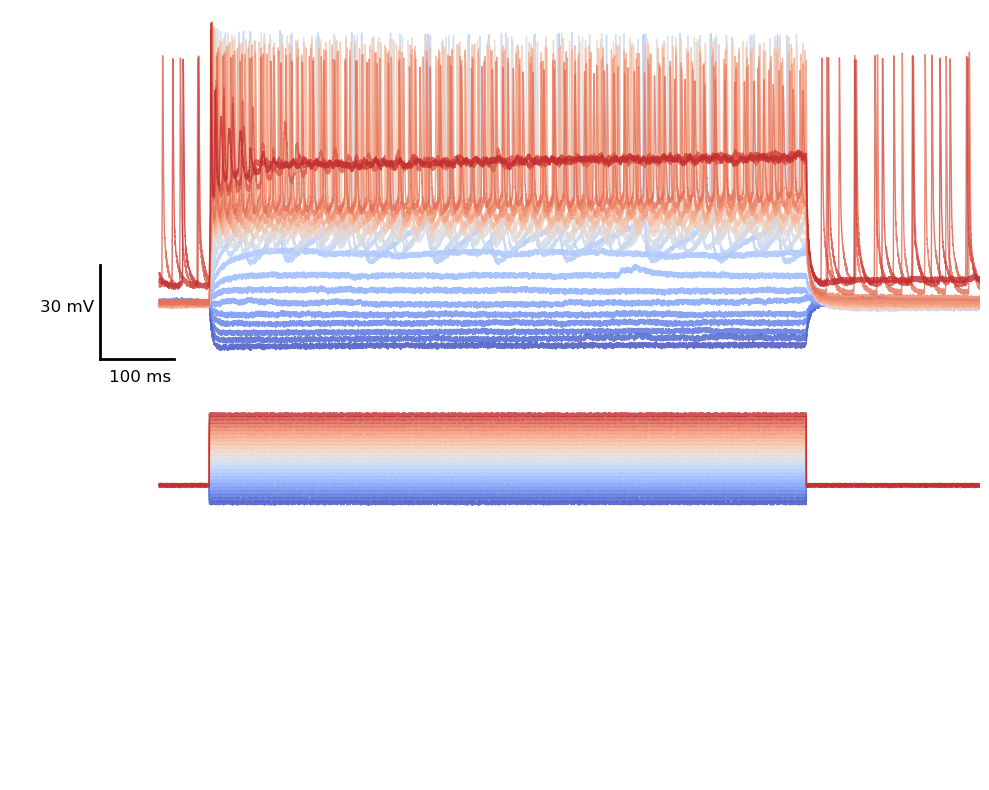

In [182]:
def plot_2D ():
    fig, ax = plt.subplots(2,1, figsize = (10,8), dpi = 100)
    
    x_max = 0
    x_min = 0
    y_max = 0
    y_min = 0
    cmd_max = 0
    cmd_min = 0
    
    for sweep in sweep_list:
        cm = plt.get_cmap("coolwarm")
        colors = [cm(x/abf.sweepCount) for x in sweep_list]
        
        # Get X and Y from In0
        abf.setSweep (sweepNumber = sweep, channel = 0)
        x = abf.sweepX
        y = abf.sweepY
        ax[0].plot (x, y, linestyle = 'solid', lw = 1, color=colors[sweep], alpha = 0.8)

        # Get Command Y
        abf.setSweep (sweepNumber = sweep, channel = 1)
        cmd = abf.sweepY
        ax[1].plot (x, cmd, linestyle = 'solid', lw = 1, color=colors[sweep], alpha = 0.8)
       
        # Get max and min of x, y, and cmd
        x_max = max (x)
        x_min = min (x)
        y_max = max ([max(y), y_max])
        y_min = min ([min(y), y_min])
        cmd_max = max ([max(cmd),cmd_max])
        cmd_min = min([min(cmd),cmd_min])
        
    # Remove frame
    ax[0].spines['top'].set_visible(False)
    ax[0].spines['bottom'].set_visible(False)
    ax[0].spines['left'].set_visible(False) 
    ax[0].spines['right'].set_visible(False)
    
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['bottom'].set_visible(False)
    ax[1].spines['left'].set_visible(False) 
    ax[1].spines['right'].set_visible(False)
    
    # Remove ticks and tick labeles
    ax[0].set_xticks ([])
    ax[0].set_yticks ([])
    ax[1].set_xticks ([])
    ax[1].set_yticks ([])
    
    # Set axis limits
    x_min = -0.2
    y_min = y_min + y_min * 0.15
    y_max = y_max + y_max * 0.15
    cmd_min = cmd_min + cmd_min * 10
    cmd_max = cmd_max + cmd_max * 0.15
    
    ax[0].set_xlim(x_min, x_max)
    ax[0].set_ylim(y_min, y_max)
    ax[1].set_xlim(x_min, x_max)
    ax[1].set_ylim(cmd_min, cmd_max)
    
    # Add scalebars
    x_range = x_max - x_min
    y_range = y_max - y_min
    cmd_range = cmd_max - cmd_min
    
    x_width = -0.08, -0.08 + (x_range/13)
    y_height = (y_min - y_min * 0.1), (y_min - y_min * 0.1) + y_range/4

    ax[0].plot (x_width, [(y_min - y_min * 0.1)] * 2, lw = 2, color = 'black')
    ax[0].plot ([-0.08] * 2, y_height, lw = 2, color = 'black')
    ax[0].annotate(str(round(y_range/4,-1)).replace('.0','') + ' mV' , xy = (-0.16, (y_min - y_min * 0.1) + y_range/8), fontsize = 12)
    ax[0].annotate(str(round(x_range/13 * 1000,0)).replace('.0','') + ' ms', xy = (-.1 + x_range/40,(y_min - y_min * 0.02)), fontsize = 12)
    
    plt.tight_layout()
    # save the figure
    plt.savefig (file_in.replace('.abf','_2d.jpg'), dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)

    
plot_2D()

## Color Map Reference

https://matplotlib.org/3.2.0/tutorials/colors/colormaps.html